# 1- Importing libraries and defining functions

In [1]:
import os
import math
import functools as F

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as pd

In [2]:
################################################################
## You can use print_shape in the following questions
################################################################

def print_shape(*statements):
  print("Shape information:")
  print('-'*100)
  L = max([len(st) for st in statements]) + 8 # width = (longest + 8) characters
  for st in statements:
    shape = eval(st).shape
    if len(shape) != 1:
      shape = [str(s) for s in shape]
      shape_str = "({})".format(", ".join(shape))
      print("{:>{w1}s}: {:>{w2}s}".format(st + ".shape", shape_str, w1=L, w2=14))
    else:
      shape_str = "({},)".format(shape[0])
      print("{:>{w1}s}: {:>{w2}s}".format(st + ".shape", shape_str, w1=L, w2=15))
      
# Test: print_shape
X = np.random.seed(0)
X = np.random.randint(0, 50, (6,5,3))
print_shape("X",
            "X.mean(axis=0)", 
            "X.mean(axis=0, keepdims=True)",
            "X.mean(axis=1)", 
            "X.mean(axis=1, keepdims=True)",
            "X.mean(axis=(0,1))",
            "X.mean(axis=(0,1), keepdims=True)",
            "X.mean(axis=(0,2))",
            "X.mean(axis=(0,2), keepdims=True)",
            "X.mean(axis=(1,2))",
            "X.mean(axis=(1,2), keepdims=True)")

Shape information:
----------------------------------------------------------------------------------------------------
                                  X.shape:      (6, 5, 3)
                     X.mean(axis=0).shape:         (5, 3)
      X.mean(axis=0, keepdims=True).shape:      (1, 5, 3)
                     X.mean(axis=1).shape:         (6, 3)
      X.mean(axis=1, keepdims=True).shape:      (6, 1, 3)
                 X.mean(axis=(0,1)).shape:            (3,)
  X.mean(axis=(0,1), keepdims=True).shape:      (1, 1, 3)
                 X.mean(axis=(0,2)).shape:            (5,)
  X.mean(axis=(0,2), keepdims=True).shape:      (1, 5, 1)
                 X.mean(axis=(1,2)).shape:            (6,)
  X.mean(axis=(1,2), keepdims=True).shape:      (6, 1, 1)


# 1- Shaping numpy arrays
* Functions:
  * ```np.expand_dims```: Add a new axis (dimension) of length 1 at a specified position 
  * ```numpy.squeeze```: Remove axes of length 1
  * ```np.reshape```: Change the shape of an array while keeping the same data (same total number,m o)
  * ```np.concatenate```: join arrays along an existing axis (the axis must already existed in the arrays)
  * ```np.stack; np.hstack, np.vstack; np.dstack```: Join arrays along a new axis (creates a new dimension)
    - `np.hstack`: horizontal stack. For example (H, W1) + (H, W2) -> (H, W1+W2)
    - `np.vstack`: vertical stack. For example, (H1, W) + (H2, W) -> (H1+H2, W)
    - `np.dstack`: depth stack which stack along the 3rd axis 
  * ```np.transpose```: Do the transpose in mathematic which helps us to reorder axes 


## Question-1: ```np.vstack vs np.concatenate```
* Information:
  * A, B, C, D: matrices of the same shape, (N, M)
* Requirements:
  1. Stack matrix A, B, C, D on the vertical direction and assign the result to variable ```X1```.
    * Note: **must use function ```np.vstack```**
    * Expected: shape of X1 is (4*N, M)
  2. Stack matrix A, B, C, D on the vertical direction and assign the result to variable ```X2```.
    * Note: **must use function ```np.concatenate```**
    * Expected: shape of X2 is (4*N, M)
  3. Show the results as in the output cell, and verify the equality of X1 and X2
  


In [6]:
# declare variables
N, M = 2, 3

# generate data
np.random.seed(0)
A = np.random.randint(0, 10, (N,M))
B = np.random.randint(0, 10, (N,M))
C = np.random.randint(0, 10, (N,M))
D = np.random.randint(0, 10, (N,M))
# set printing options
np.set_printoptions(formatter={'float': '{:<5.2f}'.format, 
                                'int': '{:<3d}'.format,
                                'bool': '{:<3}'.format })
# print inputs:
print_shape("A", "B", "C", "D")
print('-'*50)
print("Data:")
print("A:"); print(A)
print("B:"); print(B)
print("C:"); print(C)
print("D:"); print(D)
print('='*150); print()

#YOUR CODE IS HERE
X1 = np.vstack((A,B,C,D))
print("X1.shape:")
print(X1.shape)
print("X1:")
print(X1)

print('-'*50)

X2 = np.concatenate(np.array([A,B,C,D]))
print("X2.shape:")
print(X2.shape)
print("X2:")
print(X2)

Shape information:
----------------------------------------------------------------------------------------------------
  A.shape:         (2, 3)
  B.shape:         (2, 3)
  C.shape:         (2, 3)
  D.shape:         (2, 3)
--------------------------------------------------
Data:
A:
[[5   0   3  ]
 [3   7   9  ]]
B:
[[3   5   2  ]
 [4   7   6  ]]
C:
[[8   8   1  ]
 [6   7   7  ]]
D:
[[8   1   5  ]
 [9   8   9  ]]

X1.shape:
(8, 3)
X1:
[[5   0   3  ]
 [3   7   9  ]
 [3   5   2  ]
 [4   7   6  ]
 [8   8   1  ]
 [6   7   7  ]
 [8   1   5  ]
 [9   8   9  ]]
--------------------------------------------------
X2.shape:
(8, 3)
X2:
[[5   0   3  ]
 [3   7   9  ]
 [3   5   2  ]
 [4   7   6  ]
 [8   8   1  ]
 [6   7   7  ]
 [8   1   5  ]
 [9   8   9  ]]


## Question-2: ```np.hstack vs np.concatenate```
* Information:
  * A, B, C, D: matrices of the same shape, (N, M)
* Requirements:
  1. Stack matrix A, B, C, D on the horizontal direction and assign the result to variable ```X1```.
    * Note: **must use function ```np.hstack```
    * Expected: shape of X1 is (N, 4*M)
  2. Stack matrix A, B, C, D on the horizontal direction and assign the result to variable ```X2```.
    * Note: **must use function ```np.concatenate```
    * Expected: shape of X2 is (N, 4*M)
  3. Show the results as in the output cell, and verify the equality of X1 and X2
  


In [8]:
# declare variables
N, M = 2, 3

# generate data
np.random.seed(0)
A = np.random.randint(0, 10, (N,M))
B = np.random.randint(0, 10, (N,M))
C = np.random.randint(0, 10, (N,M))
D = np.random.randint(0, 10, (N,M))
# set printing options
np.set_printoptions(formatter={'float': '{:<5.2f}'.format, 
                                'int': '{:<3d}'.format,
                                'bool': '{:<3}'.format })
# print inputs:
print_shape("A", "B", "C", "D")
print('-'*50)
print("Data:")
print("A:"); print(A)
print("B:"); print(B)
print("C:"); print(C)
print("D:"); print(D)
print('='*150); print()

X1=np.hstack((A,B,C,D))
X2=np.concatenate(np.array([A,B,C,D]), axis=1)

print("X1.shape:")
print(X1.shape)

print("X1:")
print(X1)

print("X2.shape:")
print(X2.shape)

print("X2:")
print(X2)


Shape information:
----------------------------------------------------------------------------------------------------
  A.shape:         (2, 3)
  B.shape:         (2, 3)
  C.shape:         (2, 3)
  D.shape:         (2, 3)
--------------------------------------------------
Data:
A:
[[5   0   3  ]
 [3   7   9  ]]
B:
[[3   5   2  ]
 [4   7   6  ]]
C:
[[8   8   1  ]
 [6   7   7  ]]
D:
[[8   1   5  ]
 [9   8   9  ]]

X1.shape:
(2, 12)
X1:
[[5   0   3   3   5   2   8   8   1   8   1   5  ]
 [3   7   9   4   7   6   6   7   7   9   8   9  ]]
X2.shape:
(2, 12)
X2:
[[5   0   3   3   5   2   8   8   1   8   1   5  ]
 [3   7   9   4   7   6   6   7   7   9   8   9  ]]


## Question-3: ```np.dstack, np.concatenate vs np.stack```
* Information:
  * A, B, C, D: matrices of the same shape, (N, M)
* Requirements:
  1. Stack matrix A, B, C, D to get array called ```X1```, by
    * first, introduce a new dimension (called depth or channel) on the right-most of the shape, i.e., (N,M) => (N, M, 1)
    * and then, stack the matrices on the new dimension.
    * Note: 
      * **must use function ```np.dstack```**
      * Expected: shape of X1 is (N, M, 4)
  2. Stack matrix A, B, C, D to get array called ```X2```, by
    * first, introduce a new dimension (called depth or channel) on the right-most of the shape, i.e., (N,M) => (N, M, 1)
    * and then, stack the matrices on the new dimension.
    * Note: 
      * **must use function ```np.expand_dims and np.concatenate```**
      * Expected: shape of X2 is (N, M, 4)
  3. Stack matrix A, B, C, D to get array called ```X3```, by
    * first, introduce a new dimension (called depth or channel) on the right-most of the shape, i.e., (N,M) => (N, M, 1)
    * and then, stack the matrices on the new dimension.
    * Note: 
      * **must use function ```np.stack```**
      * Expected: shape of X3 is (N, M, 4)
  4. Show the results as in the output cell, and verify the equality of X1, X2, and X3
  


In [16]:
# declare variables
N, M = 2, 3

# generate data
np.random.seed(0)
A = np.random.randint(0, 10, (N,M))
B = np.random.randint(0, 10, (N,M))
C = np.random.randint(0, 10, (N,M))
D = np.random.randint(0, 10, (N,M))
# set printing options
np.set_printoptions(formatter={'float': '{:<5.2f}'.format, 
                                'int': '{:<3d}'.format,
                                'bool': '{:<3}'.format })
# print inputs:
print_shape("A", "B", "C", "D")
print('-'*50)
print("Data:")
print("A:"); print(A)
print("B:"); print(B)
print("C:"); print(C)
print("D:"); print(D)
print('='*150); print()

#YOUR CODE IS HERE
X1 = np.dstack((A,B,C,D))

print("X1.shape:")
print(X1.shape)
print("X1:")
print(X1)

A_expand = np.expand_dims(A, axis=2)
B_expand = np.expand_dims(B, axis=2)
C_expand = np.expand_dims(C, axis=2)
D_expand = np.expand_dims(D, axis=2)

X2 = np.concatenate((A_expand,B_expand,C_expand,D_expand), axis=2)

print("X2.shape:")
print(X2.shape)

print("X2:")
print(X2)

X3 = np.stack((A,B,C,D), axis=2)
print("X3.shape:")
print(X3.shape)
print("X3:")
print(X3)

Shape information:
----------------------------------------------------------------------------------------------------
  A.shape:         (2, 3)
  B.shape:         (2, 3)
  C.shape:         (2, 3)
  D.shape:         (2, 3)
--------------------------------------------------
Data:
A:
[[5   0   3  ]
 [3   7   9  ]]
B:
[[3   5   2  ]
 [4   7   6  ]]
C:
[[8   8   1  ]
 [6   7   7  ]]
D:
[[8   1   5  ]
 [9   8   9  ]]

X1.shape:
(2, 3, 4)
X1:
[[[5   3   8   8  ]
  [0   5   8   1  ]
  [3   2   1   5  ]]

 [[3   4   6   9  ]
  [7   7   7   8  ]
  [9   6   7   9  ]]]
X2.shape:
(2, 3, 4)
X2:
[[[5   3   8   8  ]
  [0   5   8   1  ]
  [3   2   1   5  ]]

 [[3   4   6   9  ]
  [7   7   7   8  ]
  [9   6   7   9  ]]]
X3.shape:
(2, 3, 4)
X3:
[[[5   3   8   8  ]
  [0   5   8   1  ]
  [3   2   1   5  ]]

 [[3   4   6   9  ]
  [7   7   7   8  ]
  [9   6   7   9  ]]]


## Question-4: ```np.stack vs np.concatenate``` (I)
* Information:
  * A, B, C, D: matrices of the same shape, (N, M)
* Requirements:
  1. Stack matrix A, B, C, D to get array called ```X1```, by
    * first, introduce a new dimension on the left-most of the shape, i.e., (N,M) => (1, N, M)
    * and then, stack the matrices on the new dimension.
    * Note: 
      * **must use function ```np.stack```**
      * Expected: shape of X1 is (4, N, M)
  2. Stack matrix A, B, C, D to get array called ```X2```, by
    * first, introduce a new dimension on the left-most of the shape, i.e., (N,M) => (1, N, M)
    * and then, stack the matrices on the new dimension.
    * Note: 
      * **must use function ```np.expand_dims and np.concatenate```**
      * Expected: shape of X2 is (4, N, M)
  3. Show the results as in the output cell, and verify the equality of X1 and X2
  


In [23]:
# declare variables
N, M = 2, 3

# generate data
np.random.seed(0)
A = np.random.randint(0, 10, (N,M))
B = np.random.randint(0, 10, (N,M))
C = np.random.randint(0, 10, (N,M))
D = np.random.randint(0, 10, (N,M))
# set printing options
np.set_printoptions(formatter={'float': '{:<5.2f}'.format, 
                                'int': '{:<3d}'.format,
                                'bool': '{:<3}'.format })
# print inputs:
print_shape("A", "B", "C", "D")
print('-'*50)
print("Data:")
print("A:"); print(A)
print("B:"); print(B)
print("C:"); print(C)
print("D:"); print(D)
print('='*150); print()

X1 = np.stack((A,B,C,D), axis=0)
print("X1.shape:")
print(X1.shape)
print("X1:")
print(X1)


A_expand = np.expand_dims(A, axis=0)
B_expand = np.expand_dims(B, axis=0)
C_expand = np.expand_dims(C, axis=0)
D_expand = np.expand_dims(D, axis=0)

X2 = np.concatenate((A_expand,B_expand,C_expand,D_expand), axis=0)
print("X2.shape:")
print(X2.shape)
print("X2:")
print(X2)


Shape information:
----------------------------------------------------------------------------------------------------
  A.shape:         (2, 3)
  B.shape:         (2, 3)
  C.shape:         (2, 3)
  D.shape:         (2, 3)
--------------------------------------------------
Data:
A:
[[5   0   3  ]
 [3   7   9  ]]
B:
[[3   5   2  ]
 [4   7   6  ]]
C:
[[8   8   1  ]
 [6   7   7  ]]
D:
[[8   1   5  ]
 [9   8   9  ]]

X1.shape:
(4, 2, 3)
X1:
[[[5   0   3  ]
  [3   7   9  ]]

 [[3   5   2  ]
  [4   7   6  ]]

 [[8   8   1  ]
  [6   7   7  ]]

 [[8   1   5  ]
  [9   8   9  ]]]
X2.shape:
(4, 2, 3)
X2:
[[[5   0   3  ]
  [3   7   9  ]]

 [[3   5   2  ]
  [4   7   6  ]]

 [[8   8   1  ]
  [6   7   7  ]]

 [[8   1   5  ]
  [9   8   9  ]]]


## Question-5: ```np.stack vs np.concatenate``` (II)
* Information:
  * A, B, C, D: matrices of the same shape, (N, M)
* Requirements:
  1. Stack matrix A, B, C, D to get array called ```X1```, by
    * first, introduce a new dimension in way such that the new dimension is the second dimension in the result array, i.e., (N,M) => (N, 1, M)
    * and then, stack the matrices on the new dimension.
    * Note: 
      * **must use function ```np.stack```**
      * Expected: shape of X1 is (N, 4, M)

  2. Stack matrix A, B, C, D to get array called ```X2```, by
    * first, introduce a new dimension in way such that the new dimension is the second dimension in the result array, i.e., (N,M) => (N, 1, M)
    * and then, stack the matrices on the new dimension.
    * Note: 
      * **must use function ```np.expand_dims and np.concatenate```**
      * Expected: shape of X1 is (N, 4, M)

  3. Show the results as in the output cell, and verify the equality of X1 and X2
  


In [24]:
# declare variables
N, M = 2, 3

# generate data
np.random.seed(0)
A = np.random.randint(0, 10, (N,M))
B = np.random.randint(0, 10, (N,M))
C = np.random.randint(0, 10, (N,M))
D = np.random.randint(0, 10, (N,M))
# set printing options
np.set_printoptions(formatter={'float': '{:<5.2f}'.format, 
                                'int': '{:<3d}'.format,
                                'bool': '{:<3}'.format })
# print inputs:
print_shape("A", "B", "C", "D")
print('-'*50)
print("Data:")
print("A:"); print(A)
print("B:"); print(B)
print("C:"); print(C)
print("D:"); print(D)
print('='*150); print()

X1=np.stack((A,B,C,D), axis=1)
print("X1.shape:")
print(X1.shape)

print("X1:")
print(X1)


A_expand = np.expand_dims(A, axis=1)
B_expand = np.expand_dims(B, axis=1)
C_expand = np.expand_dims(C, axis=1)
D_expand = np.expand_dims(D, axis=1)

X2 = np.concatenate((A_expand,B_expand,C_expand,D_expand), axis=1)
print("X2.shape:")
print(X2.shape)
print("X2:")
print(X2)



Shape information:
----------------------------------------------------------------------------------------------------
  A.shape:         (2, 3)
  B.shape:         (2, 3)
  C.shape:         (2, 3)
  D.shape:         (2, 3)
--------------------------------------------------
Data:
A:
[[5   0   3  ]
 [3   7   9  ]]
B:
[[3   5   2  ]
 [4   7   6  ]]
C:
[[8   8   1  ]
 [6   7   7  ]]
D:
[[8   1   5  ]
 [9   8   9  ]]

X1.shape:
(2, 4, 3)
X1:
[[[5   0   3  ]
  [3   5   2  ]
  [8   8   1  ]
  [8   1   5  ]]

 [[3   7   9  ]
  [4   7   6  ]
  [6   7   7  ]
  [9   8   9  ]]]
X2.shape:
(2, 4, 3)
X2:
[[[5   0   3  ]
  [3   5   2  ]
  [8   8   1  ]
  [8   1   5  ]]

 [[3   7   9  ]
  [4   7   6  ]
  [6   7   7  ]
  [9   8   9  ]]]


## Question-5: read images and combine them to a batch

### 5.1.1 Preparing dataset for this questions
* Run code cell in this sections for preparation

In [8]:
# Download the dataset
!rm -f images.tar.gz annotations.tar.gz
!wget https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz
!wget https://thor.robots.ox.ac.uk/~vgg/data/pets/annotations.tar.gz
!tar -xzf images.tar.gz
!tar -xzf annotations.tar.gz

# Import libraries
import tensorflow.keras.utils as kutils

# Define functions
def show_images(image, label, image_title, label_title):
  plt.figure(figsize=(10,5))
  ax = plt.subplot(1,2,1)
  ax.imshow(image)
  ax.set_axis_off()
  ax.set_title(image_title)

  ax = plt.subplot(1,2,2)
  ax.imshow(label, cmap='gray')
  ax.set_axis_off()
  ax.set_title(label_title)
  plt.show()

def show_image(image, title, figsize=None):
  if figsize is not None:
    plt.figure(figsize=figsize)
  else:
    plt.figure()
  plt.imshow(image)
  plt.axis("off")
  plt.title(title)


--2023-04-16 08:20:27--  https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://thor.robots.ox.ac.uk/datasets/pets/images.tar.gz [following]
--2023-04-16 08:20:27--  https://thor.robots.ox.ac.uk/datasets/pets/images.tar.gz
Reusing existing connection to thor.robots.ox.ac.uk:443.
HTTP request sent, awaiting response... 200 OK
Length: 791918971 (755M) [application/octet-stream]
Saving to: ‘images.tar.gz’

images.tar.gz       100%[===================>] 755.23M  30.2MB/s    in 26s     

2023-04-16 08:20:54 (28.8 MB/s) - ‘images.tar.gz’ saved [791918971/791918971]

--2023-04-16 08:20:54--  https://thor.robots.ox.ac.uk/~vgg/data/pets/annotations.tar.gz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.

### 5.1.2 Demo for one image

file name:  ./images/Abyssinian_10.jpg
image1.shape:  (200, 200, 3)


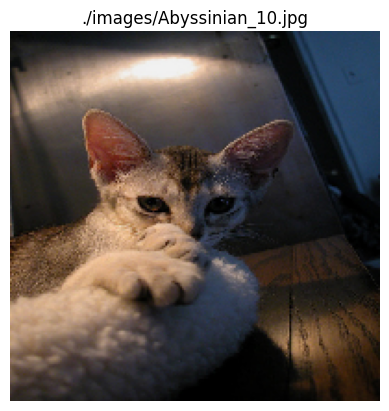

In [9]:
def load_image(filename, shape=(200,200), color_mode='rgb'):
  image = kutils.load_img(filename, target_size=shape, color_mode=color_mode)
  return np.asarray(image)

batch_files = [
    './images/Abyssinian_10.jpg',
    './images/Bengal_10.jpg',
    './images/Birman_10.jpg',
    './images/Bombay_10.jpg',
]
filename = batch_files[0]
image1 = load_image(filename)
show_image(image1, filename)
print("file name: ", filename)
print("image1.shape: ", image1.shape)

### Questiton 5.1 
* Information:
  * Each image has shape: (H, W, C), for example, (200, 200, 3)
  * Combine N images to a batch, the result array may has the following shape:
    * **with format channel-last** (default for **Keras** lib): (N, H, W, C), for example, (4, 200, 200, 3) for 4 images
    * **with format channel-first** (default for **Pytorch** lib): (N, C, H, W), for example, (4, 3, 200, 200) for 4 images
    * to convert from **with format channel-last** to **with format channel-first** or reverse, you should be ```np.transpose``` and specify parameter ```axes```
* Requirements:
  1. Load all images specified in ```batch_files```, and combine those images into a batch called ```batch_data```; the shape of the result should be **(N, H, W, C) = (4, 200, 200, 3)**
    * Guidelines:
      * use ```np.stack with axis=0```
      * or, use ```np.expand_dims``` and ```np.concatenate```
  2. Show the pictures in ```batch_data``` and their information as below


batch-size:  4
batch_data.shape: (4, 200, 200, 3)


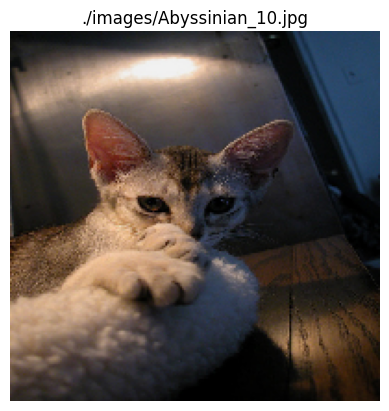

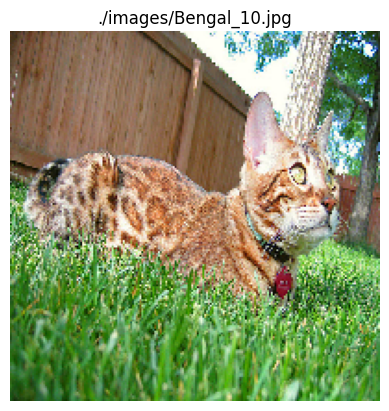

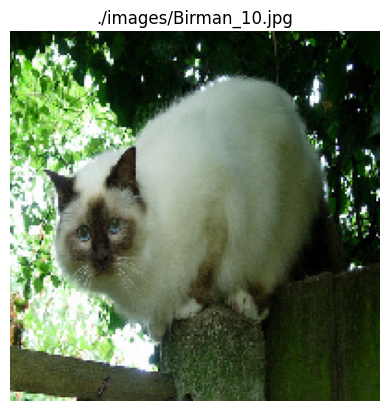

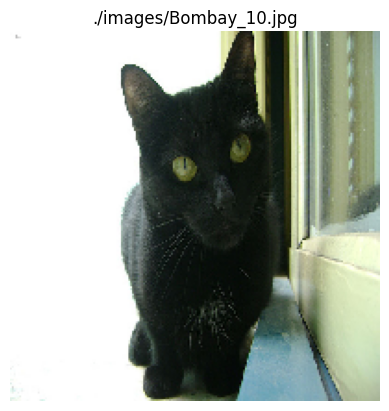

In [10]:
#YOUR CODE IS HERE




### Questiton 5.2

* Requirements:
  1. Load all images specified in ```batch_files```, and combine those images into a batch called ```batch_data_chanel_first```; the shape of the result should be **(N, C, H, W) = (4, 3, 200, 200)**
    * Guidelines:
      * use ```np.stack with axis=0``` and ```np.transpose`` with ```axes=(0,3,1,2)```
      * or, use ```np.expand_dims``` and ```np.concatenate```, in combination with  ```np.transpose`` with ```axes=(0,3,1,2)```
  2. Show the pictures in ```batch_data_chanel_first``` and their information as below
    * Guidelines:
      * each image in ```batch_data_chanel_first``` is (3, 200, 200). You must use ```np.transpose``` with ```axes=(1,2,0)``` to transform to shape (200, 200, 3) to be used with ```plt.imshow``` of ```matplotlib```


batch-size:  4
batch_data_chanel_first.shape: (4, 3, 200, 200)


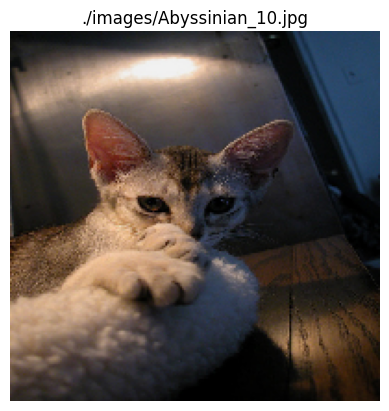

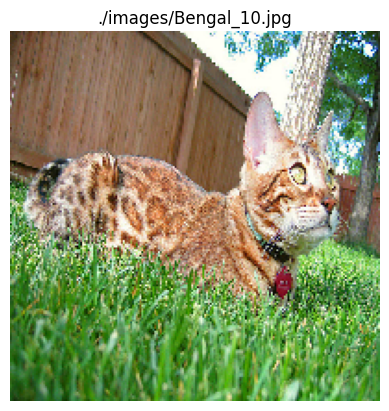

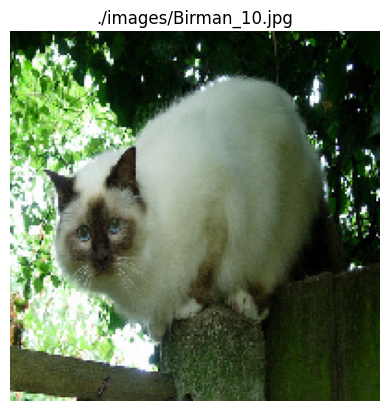

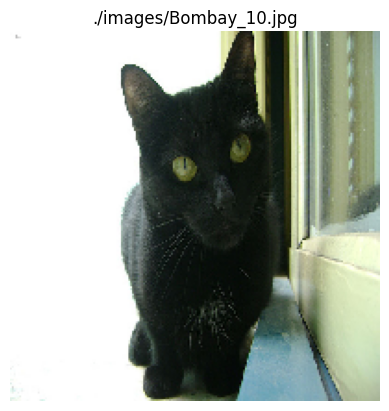

In [11]:
#YOUR CODE IS HERE


### Question 5.3
* Requirements:
  1. Load all images specified in ```batch_files```, and combine those images into an image called ```hcombined```; the shape of the result should be **(H, W*N, C) = (200, 4*200, 3)**
    * Guidelines:
      * use ```np.hstack``` or ```np.concatenate``` with axis=1
  2. Show the pictures in ```hcombined``` and their information as below


hcombined.shape: (200, 800, 3)


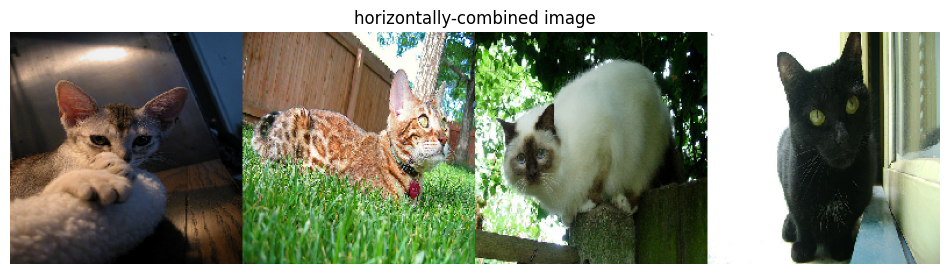

In [12]:
#YOUR CODE IS HERE


### Question 5.4
* Requirements:
  1. Load all images specified in ```batch_files```, and combine those images into an image called ```vcombined```; the shape of the result should be **(N*H, W, C) = (4*200, 200, 3)**
    * Guidelines:
      * use ```np.vstack``` or ```np.concatenate``` with axis=1
  2. Show the pictures in ```vcombined``` and their information as below


hcombined.shape: (800, 200, 3)


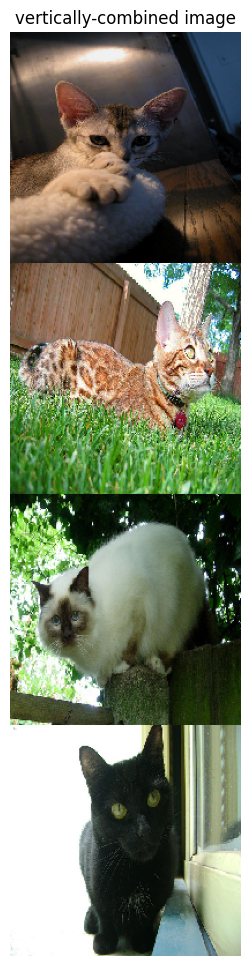

In [13]:
#YOUR CODE IS HERE


### Question 5.5 Visualizing **MNIST** dataset


#### 5.5.1 Load **MNIST** dataset
* Information:
  * Train-set: 60K small images, each of size (28,28)
  * Test-set: 10K small images, each of size (28,28)
  * So, 
    * ```X_train.shape: (60K, 28, 28)```
    * ```X_test.shape: (10K, 28, 28)```

In [14]:
from tensorflow import keras
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

print("X_train.shape: ", X_train.shape)
print("X_test.shape: ", X_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
X_train.shape:  (60000, 28, 28)
X_test.shape:  (10000, 28, 28)


#### 5.5.2 Question
* Information:
  * ```nrows``` and ```ncols``` are number of images in rows and cols repectively
  * ```N = nrows*ncols```: total image will be shown
* Requirements:
  1. Select N images uniformly from the ```X_train``` and create **a image** by combining N images into a grid of nrows and ncols, called ```combined_train```. Show ```combined_train`` image
  2. Select N images uniformly from the ```X_test``` and create **a image** by combining N images into a grid of nrows and ncols, called ```combined_test```. Show ```combined_test`` image
  * Note:  show the images as in the output cell.

* Guidelines:
  * get samples => (N, 28, 28) => reshape => (nrows, ncols, 28, 28) => transpose => (nrows, 28, ncols, 28) => reshape => (nrows x 28, ncolsx28)

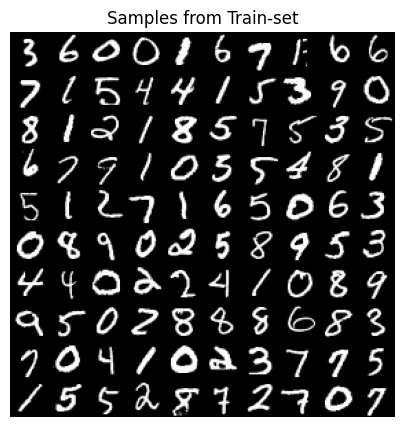

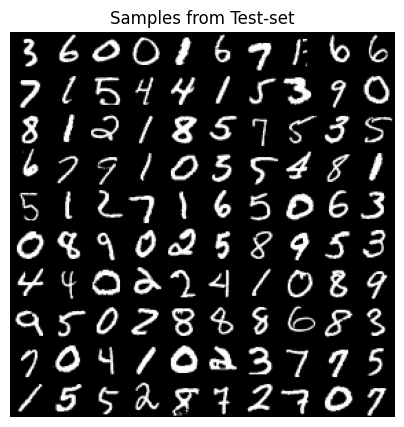

In [15]:
nrows, ncols = 10, 10
N = nrows*ncols

# YOUR CODE IS HERE

## Question 6 - Grid of color images
* Information:
  * In Question 5.1, four images have been combined into a batch, stored in variable with name ```batch_data```
    * ```batch_data.shape = (4, 200, 200, 3)```

* Requirements:
  * Create a image that combines four images into a grid of ```2x2``` sub-images, each sub-image is an image in ```batch_data```
  * Show the result as in the below picture

batch-size:  4
batch_data.shape: (4, 200, 200, 3)


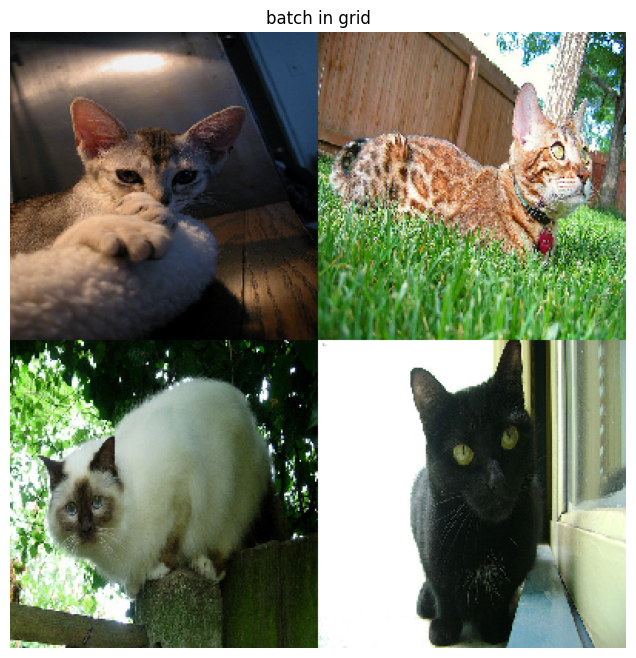

In [16]:
print('batch-size: ', len(batch_data))
print("batch_data.shape:", batch_data.shape)

#YOUR CODE IS HERE


# 2- Doing statistics
* Reference: 
  * [https://numpy.org/doc/stable/reference/routines.statistics.html](https://numpy.org/doc/stable/reference/routines.statistics.html)
* Functions: 
  * ```np.min```: return the minimum value in an array 
  * ```np.mean```: return the average value in an array
  * ```np.median```: return the median elemnt from an array 
  * ```np.max```: return the maximum value in an array
  * ```np.std```: calculate the standard deviation of that array 
  * ```np.var```: calculate the variance of an array (the square of the standard deviation; measures spread)
  * ```np.quantile```: return the value(s) at given quantile level(s) q belong [0,1]
  * ```np.percentile```: return the value(s) at given percentile(s) p belong [0,100]
  * ```np.bincount```: count the frequency of each non-negative integer value in a 1D array; returns an array wher index i contains the count of value i
  

## Question 1
* Information:
  * A is matrix: (4,3)

* Requirements:
  1. Compute the mean value for:
    * all items in A
    * for all items among axis 0, i.e., ```axis=0```
    * for all items among axis 1, i.e., ```axis=1```
  2. Show the results as in the output cell

* Guidelines:
  * You can use ```print_shape``` defined at the beginning to show the shape information.
  * Try to understand the meaning of ```keepdims=True``` (shape). **```keepdims=True``` is important in combination with broadcasting**



In [28]:
# declare variables
N, M = 4, 3

# generate data
np.random.seed(0)
A = np.random.randint(0, 10, (N,M))

# set printing options
np.set_printoptions(formatter={'float': '{:<5.2f}'.format, 
                                'int': '{:<3d}'.format,
                                'bool': '{:<3}'.format })
# print inputs:
print_shape("A")
print('-'*50)
print("Data:")
print("A:"); print(A)
print('='*150);print()

#YOUR CODE IS HERE
print(f"A.mean(): {np.mean(A)}")
print(f"A.mean(axis=1):")
print(A.mean(axis=1))
print(f"A.mean(axis=1, keepdims=True)")
print(A.mean(axis=1, keepdims=True))

print("-"*50)

print(f"A.mean(): {np.mean(A)}")
print(f"A.mean(axis=1):")
print(A.mean(axis=1))
print(f"A.mean(axis=1, keepdims=True)")
print(A.mean(axis=1, keepdims=True))

print_shape("A",
            "A.mean(axis=0)", 
            "A.mean(axis=0, keepdims=True)",
            "A.mean(axis=1)", 
            "A.mean(axis=1, keepdims=True)")



Shape information:
----------------------------------------------------------------------------------------------------
  A.shape:         (4, 3)
--------------------------------------------------
Data:
A:
[[5   0   3  ]
 [3   7   9  ]
 [3   5   2  ]
 [4   7   6  ]]

A.mean(): 4.5
A.mean(axis=1):
[2.67  6.33  3.33  5.67 ]
A.mean(axis=1, keepdims=True)
[[2.67 ]
 [6.33 ]
 [3.33 ]
 [5.67 ]]
--------------------------------------------------
A.mean(): 4.5
A.mean(axis=1):
[2.67  6.33  3.33  5.67 ]
A.mean(axis=1, keepdims=True)
[[2.67 ]
 [6.33 ]
 [3.33 ]
 [5.67 ]]
Shape information:
----------------------------------------------------------------------------------------------------
                              A.shape:         (4, 3)
                 A.mean(axis=0).shape:            (3,)
  A.mean(axis=0, keepdims=True).shape:         (1, 3)
                 A.mean(axis=1).shape:            (4,)
  A.mean(axis=1, keepdims=True).shape:         (4, 1)


## Question 2

* Information:
  * A is matrix: (4,3)

* Requirements:
  1. Compute the mean value for:
    * all items in A
    * for all items among each axis, i.e., ```axis=0```, ```axis=1```, and so on.
    * for pairs of axes, i.e., ```axis=(0,1); axis=(0,2); axis=(1,2)```
  2. Show the results as in the output cell

* Guidelines:
  * You can use ```print_shape``` defined at the beginning to show the shape information.
  * Try to understand the meaning of ```keepdims=True``` (shape). **```keepdims=True``` is important in combination with broadcasting**

In [ ]:
# declare variables
N, M, K = 5, 4, 3

# generate data
np.random.seed(0)
A = np.random.randint(0, 10, (N,M, K))

# set printing options
np.set_printoptions(formatter={'float': '{:<5.2f}'.format, 
                                'int': '{:<3d}'.format,
                                'bool': '{:<3}'.format })
# print inputs:
print("Shape information:")
print("A.shape: {:>14s}".format(str(A.shape)))
print('-'*50)
print("Data:")
print("A:"); print(A)
print('='*150); print()




Shape information:
A.shape:      (5, 4, 3)
--------------------------------------------------
Data:
A:
[[[5   0   3  ]
  [3   7   9  ]
  [3   5   2  ]
  [4   7   6  ]]

 [[8   8   1  ]
  [6   7   7  ]
  [8   1   5  ]
  [9   8   9  ]]

 [[4   3   0  ]
  [3   5   0  ]
  [2   3   8  ]
  [1   3   3  ]]

 [[3   7   0  ]
  [1   9   9  ]
  [0   4   7  ]
  [3   2   7  ]]

 [[2   0   0  ]
  [4   5   5  ]
  [6   8   4  ]
  [1   4   9  ]]]

A.mean():  4.433333333333334
A.mean(axis=0): 
[[4.40  3.60  0.80 ]
 [3.40  6.60  6.00 ]
 [3.80  4.20  5.20 ]
 [3.60  4.80  6.80 ]]
A.mean(axis=, keepdims=True): 
[[[4.40  3.60  0.80 ]
  [3.40  6.60  6.00 ]
  [3.80  4.20  5.20 ]
  [3.60  4.80  6.80 ]]]

--------------------------------------------------
A.mean():  4.433333333333334
A.mean(axis=1): 
[[3.75  4.75  5.00 ]
 [7.75  6.00  5.50 ]
 [2.50  3.50  2.75 ]
 [1.75  5.50  5.75 ]
 [3.25  4.25  4.50 ]]
A.mean(axis=1, keepdims=True): 
[[[3.75  4.75  5.00 ]]

 [[7.75  6.00  5.50 ]]

 [[2.50  3.50  2.75 ]]

 [[1.7

## Question 3
* Requirements:
  * Similar to Question 1 and 2; replace ```mean``` by ```std``` to compute the standard deviation 

In [19]:
# declare variables
N, M, K = 5, 4, 3

# generate data
np.random.seed(0)
A = np.random.randint(0, 10, (N,M, K))

# set printing options
np.set_printoptions(formatter={'float': '{:<5.2f}'.format, 
                                'int': '{:<3d}'.format,
                                'bool': '{:<3}'.format })
# print inputs:
print("Shape information:")
print("A.shape: {:>14s}".format(str(A.shape)))
print('-'*50)
print("Data:")
print("A:"); print(A)
print('='*150); print()

#YOUR CODE IS HERE


Shape information:
A.shape:      (5, 4, 3)
--------------------------------------------------
Data:
A:
[[[5   0   3  ]
  [3   7   9  ]
  [3   5   2  ]
  [4   7   6  ]]

 [[8   8   1  ]
  [6   7   7  ]
  [8   1   5  ]
  [9   8   9  ]]

 [[4   3   0  ]
  [3   5   0  ]
  [2   3   8  ]
  [1   3   3  ]]

 [[3   7   0  ]
  [1   9   9  ]
  [0   4   7  ]
  [3   2   7  ]]

 [[2   0   0  ]
  [4   5   5  ]
  [6   8   4  ]
  [1   4   9  ]]]

A.std():  2.8830924754891614
A.std(axis=0): 
[[4.40  3.60  0.80 ]
 [3.40  6.60  6.00 ]
 [3.80  4.20  5.20 ]
 [3.60  4.80  6.80 ]]
A.std(axis=, keepdims=True): 
[[[2.06  3.38  1.17 ]
  [1.62  1.50  3.35 ]
  [2.86  2.32  2.14 ]
  [2.94  2.32  2.23 ]]]

--------------------------------------------------
A.std():  2.8830924754891614
A.std(axis=1): 
[[0.83  2.86  2.74 ]
 [1.09  2.92  2.96 ]
 [1.12  0.87  3.27 ]
 [1.30  2.69  3.42 ]
 [1.92  2.86  3.20 ]]
A.std(axis=1, keepdims=True): 
[[[0.83  2.86  2.74 ]]

 [[1.09  2.92  2.96 ]]

 [[1.12  0.87  3.27 ]]

 [[1.30  2

## Question 4

* Requirements:
  * Similar to Question 1, 2 and 3; do the similar tasks for the following functions: min, max, median, var, 

# 3 - Sorting, Searching, and Counting
API Reference: 
* Link: [https://numpy.org/doc/stable/reference/generated/numpy.argmax.html](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html)

## 3.0 Examples

In [29]:
# declare variables
N, M = 6, 4

# generate data
np.random.seed(0)
A = np.random.randint(15, 99, (N,M))

# set printing options
np.set_printoptions(formatter={'float': '{:<5.2f}'.format, 
                                'int': '{:<3d}'.format,
                                'bool': '{:<3}'.format })
# print inputs:
print_shape("A")
print('-'*50)
print("Data:")
print("A:"); print(A)
print('='*150); print()

print("np.max vs np.argmax (similar for min/argmin")
print("-"*80)
print("A.max(): ", A.max())
print("A.argmax(): ", A.argmax())
print("Location in A of the maximum: ", np.unravel_index(A.argmax(), shape=A.shape))
print()
print("A.max(axis=0): ", A.max(axis=0))
print("A.argmax(axis=0): ", A.argmax(axis=0))
print("Location in A of the max(axis=0): ", list(zip(A.argmax(axis=0), np.arange(M))))

print()
print("A.max(axis=1): ", A.max(axis=1))
print("A.argmax(axis=1): ", A.argmax(axis=1))
print("Location in A of the max(axis=1): ", list(zip(np.arange(N), A.argmax(axis=1))))

print()
print("np.sort vs np.argsort (similar for min/argmin")
print("-"*80)

print('Sorting A ascendingly, along axis=0: [A.sort(axis=0)]')
B = A.copy()
B.sort(axis=0) # sort B, keep A original
print(B)

print()
print('Sorting A descendingly, along axis=0: [use [::-1, :]]')
B = A.copy()
B.sort(axis=0) # sort B, keep A original
print(B[::-1, :])

print()
print('Sorting A descendingly, along axis=1: [use [:, ::-1]]')
B = A.copy()
B.sort(axis=1) # sort B, keep A original
print(B[:, ::-1])

print()
print('Sorting A descendingly, along axis=1; return index of sorted items')
B = A.copy()
B.argsort(axis=1) # sort B, keep A original
print(B.argsort(axis=1)[:, ::-1])

print()
print("If you want to convert index to items for a column, e.g, column=0: ")
selected_col = B.argsort(axis=1)[:, ::-1][:, 0]
print("selected_col (on argsort's result): ", selected_col)
selected_item = B[np.arange(N), selected_col]
print("Selected items: ", selected_item)

print('-'*100)

Shape information:
----------------------------------------------------------------------------------------------------
  A.shape:         (6, 4)
--------------------------------------------------
Data:
A:
[[59  62  79  82 ]
 [82  24  98  36 ]
 [51  85  27  73 ]
 [80  54  61  96 ]
 [52  40  92  87 ]
 [24  35  95  84 ]]

np.max vs np.argmax (similar for min/argmin
--------------------------------------------------------------------------------
A.max():  98
A.argmax():  6
Location in A of the maximum:  (np.int64(1), np.int64(2))

A.max(axis=0):  [82  85  98  96 ]
A.argmax(axis=0):  [1   2   1   3  ]
Location in A of the max(axis=0):  [(np.int64(1), np.int64(0)), (np.int64(2), np.int64(1)), (np.int64(1), np.int64(2)), (np.int64(3), np.int64(3))]

A.max(axis=1):  [82  98  85  96  92  95 ]
A.argmax(axis=1):  [3   2   1   3   2   2  ]
Location in A of the max(axis=1):  [(np.int64(0), np.int64(3)), (np.int64(1), np.int64(2)), (np.int64(2), np.int64(1)), (np.int64(3), np.int64(3)), (np.int64(4

## Question 3.1: 
* Information:
  * ```predictions```: the output of classification's model. Each row is a categorical distribution: each value is within [0,1] and sum of them equals to 1
  * ```index2name```: a dictionary to map from predicted index to class's name

* Requirements:
  1. Determine the predicted class names
  2. Show the result as in the output cell below

* Guidelines:
  * take ```argmax``` among rows
  * use ```index2name``` to map the index (returned by ```argmax```) to class names



In [21]:
predictions = np.array([
    [0.1, 0.3,  0.1, 0.5],
    [0.2, 0.6,  0.1, 0.1],
    [0.2, 0.05, 0.7, 0.05]
])
index2name = {
    0: "Cat",
    1: "Chicken",
    2: "Dog",
    3: "Horse"
}

# YOUR CODE IS HERE


Predicted Classes (index):  [3   1   2  ]
Predicted Classes (Name):  ['Horse', 'Chicken', 'Dog']


## Question 3.2:
* Information:
  * ```decode_classification```: a function receives 3 parameters:
    1. ```model_output```: the output of a classification's model, for example, variable ```predictions```
    2. ```class_names```: a mapping from index to name, for example, variable ```index2name```.
    3. ```top```: number of predicted names should be selected, default is 1
    * ```decode_classification``` determines the top-k classes with largest predicted probability (score). It returns a list of tuples, see the output cell below

* Requirements:
  * Fill code to ```decode_classification```

* Guidelines:
  * use ```argsort``` to sort ```predictions``` **descendingly**
  * select top-k columns in the result of ```argsort```
    * the index returned by top-k is class-index, map to name by using ```index2name```
    * class-index is used to get score (probability) in ```predictions```
    * combine name and score and returns.
      * can use for-loop for each column in top-k selected columns
      * can use ```zip``` to combine (name, score)



In [22]:
def decode_classification(model_output:np.array, class_names:(list, tuple, dict), top=1):
  # YOUR CODE IS HERE

  
  pass

##Input:
predictions = np.array([
    [0.1, 0.3,  0.1, 0.5],
    [0.2, 0.6,  0.1, 0.1],
    [0.2, 0.05, 0.7, 0.05]
])
index2name = {
    0: "Cat",
    1: "Chicken",
    2: "Dog",
    3: "Horse"
}
# Call function for testing
decode_classification(predictions, index2name, top=2)

[(('Horse', 0.5), ('Chicken', 0.3)),
 (('Chicken', 0.6), ('Cat', 0.2)),
 (('Dog', 0.7), ('Cat', 0.2))]

## Question 3.3:
* Information:
  * ```predictions```: the output of classification's model. Each row is a categorical distribution: each value is within [0,1] and sum of them equals to 1
  * ```index2name```: a dictionary to map from predicted index to class's name
  * ```confidence```: a value to select from ```predictions``` all the values >= ``confidence```

* Requirements:
  1. Select only the predictions that their scores >= ```confidence```
  2. Find the corresponding class names for seletced scores.
  3. Present the result as shown in the output cell

* Guidelines:
  * use ```np.argwhere``` to select scores >= ```confidence``` => return list of locations (row-index, col-index); where, row-index is the sample index, col-index is predicted class's index
  * use ```predictions[row-index, col-index]``` => score
  * map col-index to name by using ```index2name```

In [23]:
##Input:
predictions = np.array([
    [0.1, 0.3,  0.1, 0.5],
    [0.2, 0.6,  0.1, 0.1],
    [0.2, 0.05, 0.7, 0.05]
])
index2name = {
    0: "Cat",
    1: "Chicken",
    2: "Dog",
    3: "Horse"
}
confidence = 0.6

#YOUR CODE IS HERE


[('Chicken', 0.6), ('Dog', 0.7)]
